# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv('../diabetes_prediction_dataset_raw/data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Cek informasi dataset
print("Shape dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Shape dataset: (100000, 9)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diab

In [4]:
# Statistik deskriptif
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Distribusi target variable (diabetes)
print("Distribusi kelas diabetes:")
print(df['diabetes'].value_counts())
print("\nPersentase:")
print(df['diabetes'].value_counts(normalize=True) * 100)

Distribusi kelas diabetes:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Persentase:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


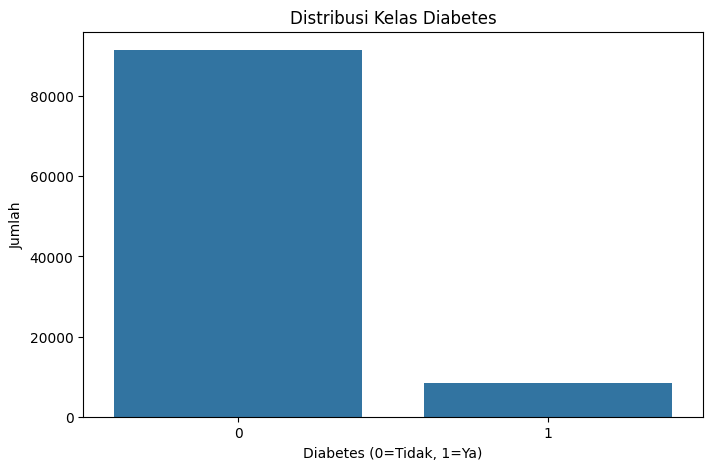

In [6]:
# Visualisasi distribusi target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diabetes')
plt.title('Distribusi Kelas Diabetes')
plt.xlabel('Diabetes (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah')
plt.show()

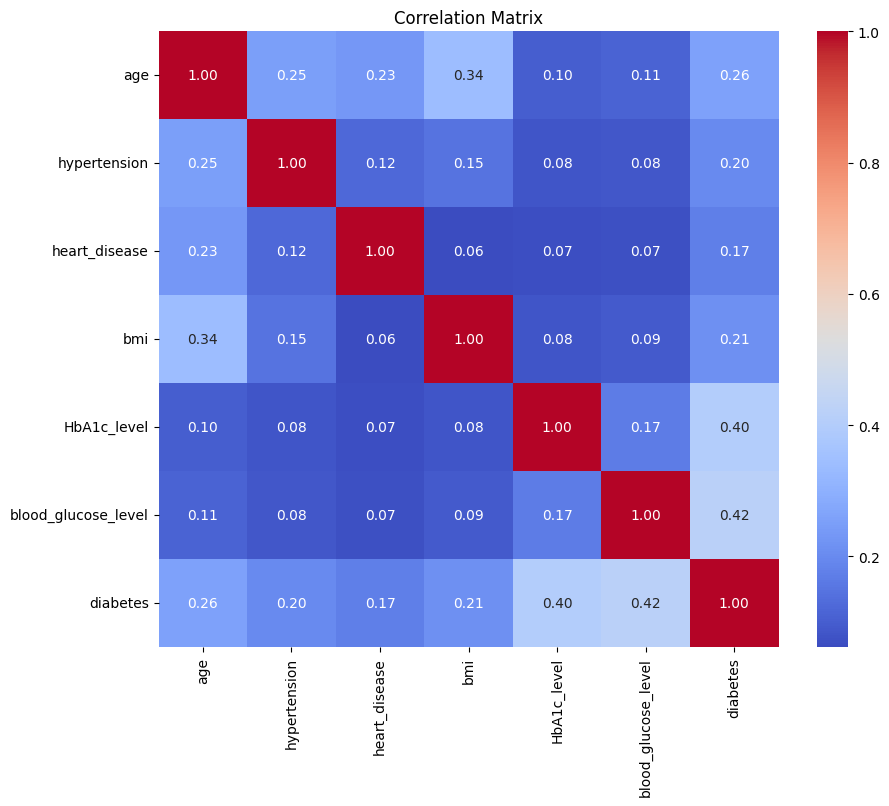

In [7]:
# Correlation matrix untuk fitur numerik
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

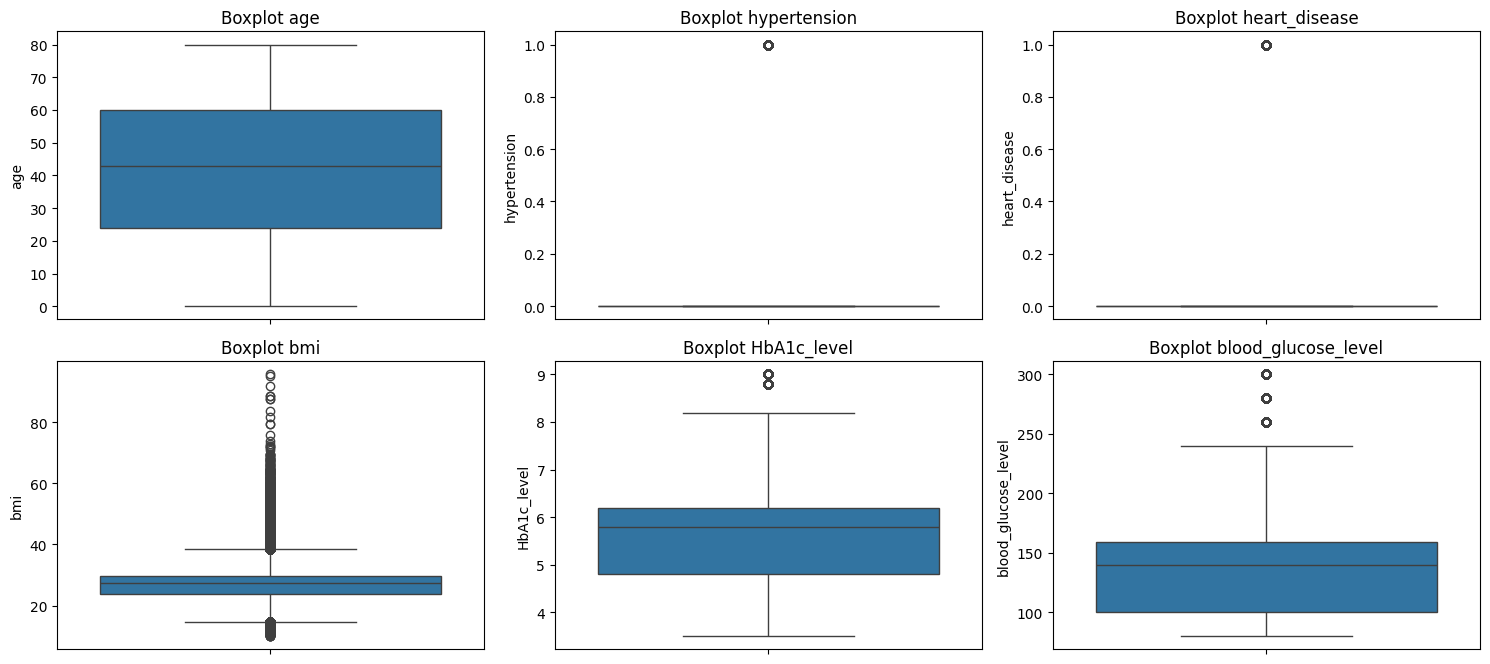

In [8]:
# Deteksi outlier dengan boxplot
plt.figure(figsize=(15, 10))
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('diabetes')

for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
    
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# cek dan atasi missing values jika ada
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
# cek data duplikat jika ada
df.duplicated().sum()
# Hapus duplikat jika ada
df_clean = df.drop_duplicates()
print(f"Data sebelum: {df.shape}")
print(f"Data setelah: {df_clean.shape}")
print(f"Duplikat dihapus: {df.shape[0] - df_clean.shape[0]}")

Data sebelum: (100000, 9)
Data setelah: (96146, 9)
Duplikat dihapus: 3854


In [11]:
# Encoding data kategorikal
from sklearn.preprocessing import LabelEncoder

# Cek kolom kategorikal
print("Kolom kategorikal:")
print(df_clean.select_dtypes(include='object').columns.tolist())

Kolom kategorikal:
['gender', 'smoking_history']


In [12]:
# Label encoding untuk gender dan smoking_history
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])
df_clean['smoking_history'] = le_smoking.fit_transform(df_clean['smoking_history'])

print("Gender encoding:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print("Smoking encoding:", dict(zip(le_smoking.classes_, le_smoking.transform(le_smoking.classes_))))

Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Smoking encoding: {'No Info': np.int64(0), 'current': np.int64(1), 'ever': np.int64(2), 'former': np.int64(3), 'never': np.int64(4), 'not current': np.int64(5)}


C:\Users\INDRA\AppData\Local\Temp\ipykernel_14276\1169579002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])
C:\Users\INDRA\AppData\Local\Temp\ipykernel_14276\1169579002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['smoking_history'] = le_smoking.fit_transform(df_clean['smoking_history'])


In [13]:
# Pisahkan fitur dan target
X = df_clean.drop('diabetes', axis=1)
y = df_clean['diabetes']

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (96146, 8)
Shape y: (96146,)


In [14]:
# Split data train dan test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (76916, 8)
X_test shape: (19230, 8)
y_train shape: (76916,)
y_test shape: (19230,)


In [15]:
# Standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standarisasi selesai")
print("Mean X_train_scaled:", X_train_scaled.mean(axis=0).round(2))
print("Std X_train_scaled:", X_train_scaled.std(axis=0).round(2))

Standarisasi selesai
Mean X_train_scaled: [ 0. -0.  0.  0. -0. -0. -0. -0.]
Std X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
# Handle imbalanced data - akan menggunakan class_weight di model Random Forest
# Karena Python 3.12 ada issue kompatibilitas dengan SMOTE
# Alternatif: gunakan class_weight='balanced' saat training model

print("Data imbalance akan ditangani dengan class_weight='balanced' di Random Forest")
print("\nDistribusi data training:")
print(y_train.value_counts())
print("\nPersentase:")
print(y_train.value_counts(normalize=True) * 100)

# Data yang akan digunakan untuk training
X_train_final = X_train_scaled
y_train_final = y_train

Data imbalance akan ditangani dengan class_weight='balanced' di Random Forest

Distribusi data training:
diabetes
0    70130
1     6786
Name: count, dtype: int64

Persentase:
diabetes
0    91.177388
1     8.822612
Name: proportion, dtype: float64
